In [83]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

Now it's time to upload student data and 6 columns

In [84]:
style.use("ggplot")

#Open data file
data = pd.read_csv("student-mat.csv", sep=";")

# get G1  G2  absences  failures  studytime information of students
predict = "G3"
data = data[["G1", "G2", "absences","failures", "studytime","G3"]]

# sklearn.model_selection train_test_split
x = np.array(data.drop([predict], axis = 1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)


We can also check the content of collected data

In [85]:

print("\nINFO: data.drop([predict], axis=1)")
print(data.drop([predict], axis=1)) # G1  G2  absences  failures  studytime
print("\nINFO: data[predict], predict = G3")
print(data[predict]) # Name: G3, Length: 395, dtype: int64
print("\n")



INFO: data.drop([predict], axis=1)
     G1  G2  absences  failures  studytime
0     5   6         6         0          2
1     5   5         4         0          2
2     7   8        10         3          2
3    15  14         2         0          3
4     6  10         4         0          2
..   ..  ..       ...       ...        ...
390   9   9        11         2          2
391  14  16         3         0          1
392  10   8         3         3          1
393  11  12         0         0          1
394   8   9         5         0          1

[395 rows x 5 columns]

INFO: data[predict], predict = G3
0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64




And rewritten my_train_test_split that works same as regular sklearn function
$$$$

Input:
$$\dim(X) = n_{samples} \times n_{features}$$
$$\dim(y) = n_{samples} \times 1$$

In function:
$$n_{samples} = rows(X)$$
$$test_{size} = (test_{size} * n_{samples})$$

$$dim(train_{indices}) = n_{samples} - test_{size}$$
$$dim(test_{indices}) = test_{size}$$

Output:
$$dim(X_{train}) = train_{indices} \times n_{features}$$
$$dim(y_{train}) = train_{indices} \times 1$$
$$dim(X_{test}) = test_{indices} \times n_{features}$$
$$dim(y_{test}) = test_{indices} \times 1$$


In [86]:
import random
def my_train_test_split(X, y, test_size=0.10, random_state=None):
    """Splits data into training and testing sets.

    Args:
        X: Input data matrix.
        y: Target variable.
        test_size: Proportion of data to be used for testing.
        random_state: Seed for random number generator.

    Returns:
        Tuple of training and testing data.
    """

    if random_state is not None:
        random.seed(random_state)

    n_samples = len(X)
    test_size = int(test_size * n_samples)

    indices = list(range(n_samples))
    random.shuffle(indices)

    train_indices = indices[:n_samples - test_size]
    test_indices = indices[n_samples - test_size:]

    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test


X_train, X_test, Y_train, Y_test = my_train_test_split(x, y, test_size = 0.1)

print( "x_train equality: ",np.array_equal(X_train.sort(),x_train.sort())  )
print( "x_test equality: ",np.array_equal(X_test.sort(),x_test.sort())  )
print( "y_train equality: ",np.array_equal(Y_train.sort(),y_train.sort())  )
print( "y_test equality: ",np.array_equal(Y_test.sort(),y_test.sort())  )
print("\n")

x_train equality:  True
x_test equality:  True
y_train equality:  True
y_test equality:  True




We implement linear regression without scikit-learn

$$ m = n_{features} $$
$$ n = n_{samples} $$
$$ dim(X) = n \times m, \quad  dim(y) = n \times 1,\quad dim(w) = m \times 1,\quad \dim(b) = 1 \times 1 $$
$$$$
$$ y = f_{w,b}(X) = Xw+b $$
$$ y_1 = f_{w,b}(x_{11},x_{12},...,x_{1m}) = x_{11}w_1+x_{12}w_2 + \dots + x_{1m}w_m + b $$
$$ y_2 = f_{w,b}(x_{21},x_{22},...,x_{2m}) = x_{21}w_1+x_{22}w_2 + \dots + x_{2m}w_m + b $$
$$\dots$$
$$ y_n = f_{w,b}(x_{n1},x_{n2},...,x_{nm}) = x_{n1}w_1+x_{n2}w_2 + \dots + x_{nm}w_m + b $$
$$$$
In code we update X in X = np.insert(X, 0, 1, axis=1)
$$X =
\begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1m} \\
1 & x_{21} & x_{22} & \dots & x_{2m} \\
\dots & \dots & \dots & \dots & \dots \\
1 & x_{n1} & x_{n2} & \dots & x_{nm} \\
\end{bmatrix}
$$
$$XT\_X\_inv = (X^T * X) ^ {-1}$$
$$weights = (X^T * X) ^ {-1} \times X^T \times y$$
$$intercept\_ = column(weights,1,1)$$
$$coef\_ = column(weights,2,m)$$
$$$$
$$y_{predict} = X \times coef\_ + intercept\_$$

In [87]:
# eImplement linear regression from scratch (without scikit-learn)
class LinearRegression:
    def __init__(self):
        self.coef_ = None  # Coefficients (weights)
        self.intercept_ = None  # Intercept (bias)

    def fit(self, X, y):
        """Fits the linear regression model to the data.

        Args:
            X: Training data matrix.
            y: Training target variable.
        """

        X = np.insert(X, 0, 1, axis=1)  # add ones vector
        XT_X_inv = np.linalg.inv(X.T @ X)  # (X.T * X) ** (-1) inverse matrix
        weights = np.linalg.multi_dot([XT_X_inv, X.T, y])  # XT_X_inv * X.T * y
        self.intercept_, self.coef_ = weights[0], weights[1:]

    def predict(self, X):
        """Predicts the target variable for a given input.

        Args:
            X: Input data matrix.

        Returns:
            Predicted target variable.
        """

        return X @ self.coef_ + self.intercept_



TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE

In [88]:
best = 0
for _ in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()
    my_linear = LinearRegression()

    linear.fit(x_train, y_train)
    my_linear.fit(x_train, y_train)

    acc = linear.score(x_test, y_test)

    my_predicted = linear.predict(x_test)
    mse = np.mean((my_predicted - y_test) ** 2)
    my_acc = 1 - mse  # Higher value indicates better fit (closer to 1)
    print("Accuracy: " + str(acc)+" My accuracy (1 - MSE):", my_acc)

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
        with open("my_studentgrades.pickle", "wb") as f:
            pickle.dump(my_linear, f)
print(best)


# LOAD MODEL
pickle_in = open("studentgrades.pickle", "rb")
my_pickle_in = open("my_studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)
my_linear = pickle.load(my_pickle_in)

print("-------------------------")
print('Coefficient: \n', linear.coef_)
print("My Coefficient:\n", my_linear.coef_)
print('Intercept: \n', linear.intercept_)
print("My Intercept:\n", my_linear.intercept_)
print("-------------------------")

predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])

Accuracy: 0.758692684269971 My accuracy (1 - MSE): -4.522167103409382
Accuracy: 0.8376906814835845 My accuracy (1 - MSE): -1.7511429488532433
Accuracy: 0.8349216824337984 My accuracy (1 - MSE): -3.319996396759019
Accuracy: 0.8822943626840726 My accuracy (1 - MSE): -1.660073837316637
Accuracy: 0.7827223551304903 My accuracy (1 - MSE): -5.433455266058138
Accuracy: 0.9232036714289796 My accuracy (1 - MSE): 0.07695612828169218
Accuracy: 0.7392600738685271 My accuracy (1 - MSE): -3.862799622351969
Accuracy: 0.8680660505671229 My accuracy (1 - MSE): -1.7467823684741033
Accuracy: 0.8009802949218285 My accuracy (1 - MSE): -2.9573824481637656
Accuracy: 0.8911738959261055 My accuracy (1 - MSE): -2.0403292825644286
Accuracy: 0.8585408332072024 My accuracy (1 - MSE): -2.0240433381130307
Accuracy: 0.9031685212572312 My accuracy (1 - MSE): -1.0062877198759552
Accuracy: 0.8864838288864203 My accuracy (1 - MSE): -1.3131757768669692
Accuracy: 0.8245049123542769 My accuracy (1 - MSE): -1.789384733698990

Driving plots

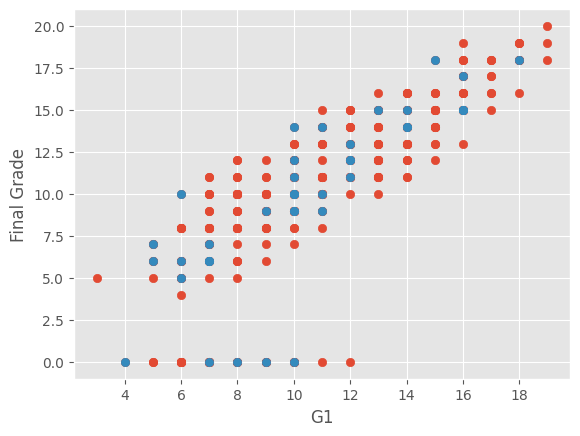

In [89]:
# Drawing and plotting model
# put plot ["G1", "G2", "absences","failures", "studytime"]
plot = "G1"
column_index = {'G1': 0, 'G2': 1, 'absences': 2, 'failures': 3, 'studytime': 4}
index = column_index[plot]

pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)
predicted= linear.predict(x_test)


plt.scatter(data[plot], data["G3"])
plt.scatter(x_test[:, index], y_test)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

Now calculate Evaluation criteria MSE, RMSE, MAE, R-squared:

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)
predicted = linear.predict(x_test)

print("Accuracy: ",linear.score(x_test, y_test))

mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)

Accuracy:  0.8493079226189413
MSE:  3.818160510642577
RMSE:  1.954011389588755
MAE:  1.2169306090009187
R-squared:  0.8493079226189413
